In [3]:
import os
import time
import numpy as np
import torch
import torch.nn as nn
import argparse
import matplotlib.pyplot as plt
import math
seed=0
torch.random.manual_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)  
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [4]:
import matplotlib.pyplot as plt
import numpy as np


def format_settings(
        wspace=0.25, 
        hspace=0.4, 
        left=0.12, 
        right=0.9, 
        bottom=0.15, 
        top=0.95,
        fs=12,
        show_dpi=80,
        save_dpi=300,
        lw=1.5,
        ms=5,
        axlw=1.5,
        major_tick_len=5,
        major_tick_width=1.5,
        major_tick_pad=5,
        minor_tick_len=0,
        minor_tick_width=0,
        minor_tick_pad=5,
        ):
    '''
        使用方法：
            fig = plt.figure(figsize=(12, 4), dpi=300)
            format_settings()
            grid = plt.GridSpec(2, 2)
            ax1 = fig.add_subplot(grid[0, 0]) # 左上角图
            ax2 = fig.add_subplot(grid[0, 1]) # 右上角图
            ax3 = fig.add_subplot(grid[:, 0]) # 底部空间合并一张图
        注意：
            以上文字和坐标轴粗细适用于figsize长度为12的情形，宽度可调。
            若要调整figsize长度，需要相应调整以上文字和坐标轴粗细。
    '''
    # 设置子图线宽
    plt.rcParams['lines.linewidth'] = lw
    
    # 子图点大小
    plt.rcParams['lines.markersize'] = ms
    
    # 子图间距与位置  w:左右 h:上下
    plt.subplots_adjust(wspace=wspace, hspace=hspace, left=left, right=right, bottom=bottom, top=top)

    # 字体大小
    plt.rcParams['font.size'] = fs
    plt.rcParams['axes.labelsize'] = fs
    plt.rcParams['axes.titlesize'] = fs
    plt.rcParams['xtick.labelsize'] =fs
    plt.rcParams['ytick.labelsize'] = fs
    plt.rcParams['legend.fontsize'] = fs
    # 子图坐标轴宽度
    plt.rcParams['axes.linewidth'] = axlw
    # 子图坐标轴可见性
    plt.rcParams['axes.spines.top'] = True
    plt.rcParams['axes.spines.right'] = True
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.bottom'] = True

    # 子图坐标轴刻度宽度
    plt.rcParams['xtick.major.width'] = major_tick_width
    plt.rcParams['ytick.major.width'] = major_tick_width
    plt.rcParams['xtick.minor.width'] = minor_tick_width
    plt.rcParams['ytick.minor.width'] = minor_tick_width
    # 子图坐标轴刻度长度
    plt.rcParams['xtick.major.size'] = major_tick_len
    plt.rcParams['ytick.major.size'] = major_tick_len
    plt.rcParams['xtick.minor.size'] = minor_tick_len
    plt.rcParams['ytick.minor.size'] = minor_tick_len
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.major.pad'] = major_tick_pad
    plt.rcParams['ytick.major.pad'] = major_tick_pad
    plt.rcParams['xtick.minor.pad'] = minor_tick_pad
    plt.rcParams['ytick.minor.pad'] = minor_tick_pad
    
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.top'] = False 
    plt.rcParams['ytick.right'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['legend.frameon'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['figure.dpi'] = show_dpi
    # 子图坐标轴刻度标签位置
    plt.rcParams['savefig.dpi'] = save_dpi

In [5]:
from functools import partial

def ricker(x, a):
    return (2/(30*a))*(math.pi**0.25) * (1 - (x/a)**2) * np.exp(-0.5*(x/a)**2)

# 将 a 固定为 2.0
ricker_fixed_a1 = partial(ricker, a=0.3)
ricker_fixed_a2 = partial(ricker, a=0.1)


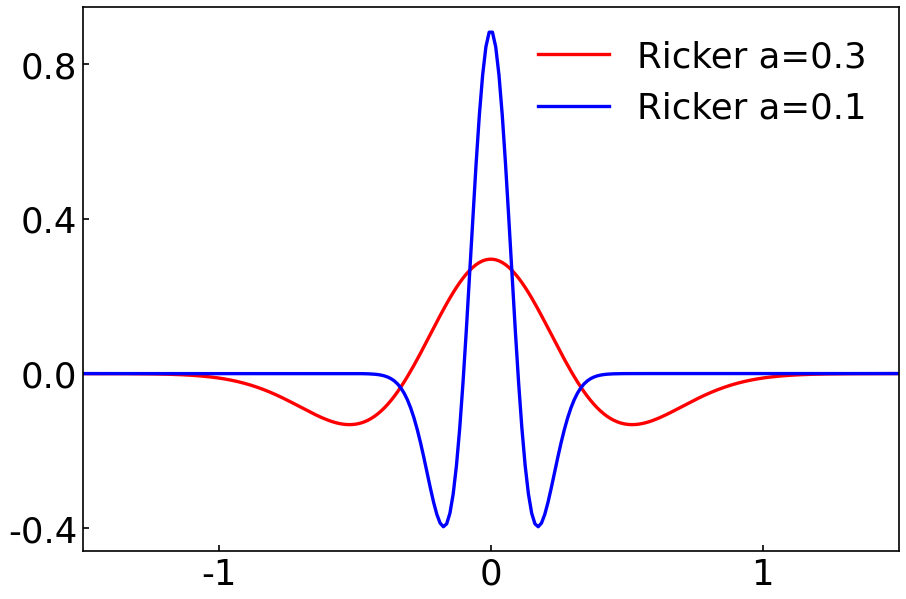

In [25]:
x=np.linspace(-3,3,500)

fig=plt.figure(figsize=(12,8))
format_settings(left=0.1, right=0.95, bottom=0.1,top=0.95,fs=32
        )



plt.plot(x, ricker_fixed_a1(x), 'r-', label='Ricker a=0.3', lw=3)

plt.plot(x, ricker_fixed_a2(x), 'b-', label='Ricker a=0.1', lw=3)

plt.xlim(-1.5,1.5)

plt.xticks([-1,0,1],['-1','0','1'])

plt.yticks([-0.4,0.0,0.4, 0.8],['-0.4','0.0','0.4','0.8'])

plt.legend(loc='upper right')

plt.savefig('ricker_out.png',dpi=300)

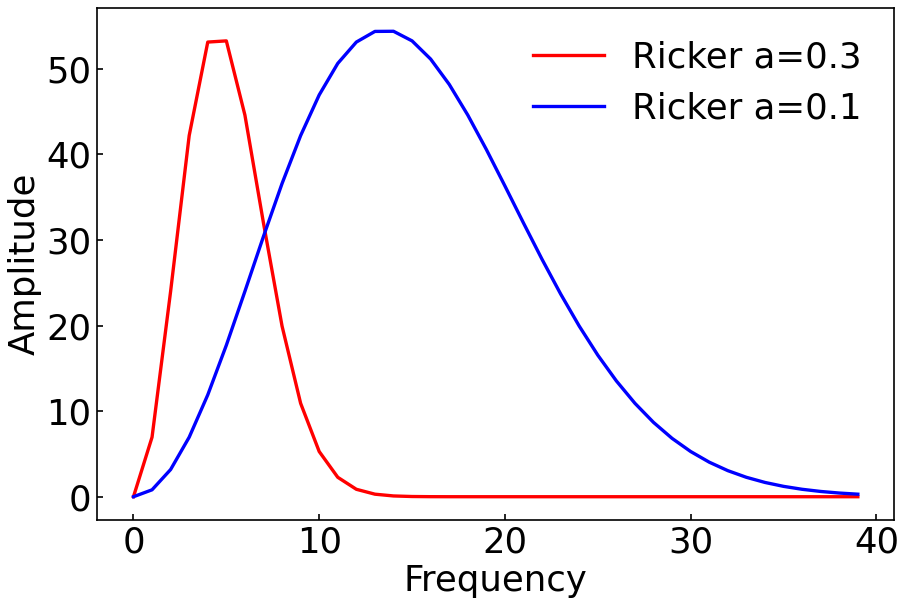

In [27]:


from utils import my_fft, SelectPeakIndex

x=np.linspace(-3,3,2000)

fig=plt.figure(figsize=(12,8))
format_settings(left=0.12, right=0.95, bottom=0.15,top=0.95,fs=32
        )



plt.plot(range(40), my_fft(ricker_fixed_a1(x)), 'r-', label='Ricker a=0.3', lw=3)

plt.plot(range(40), my_fft(ricker_fixed_a2(x)), 'b-', label='Ricker a=0.1', lw=3)

# plt.xlim(-1.5,1.5)

# plt.xticks([-1,0,1],['-1','0','1'])

# plt.yticks([-0.4,0.0,0.4, 0.8],['-0.4','0.0','0.4','0.8'])

plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.legend(loc='upper right')
plt.savefig('ricker_freq.png',dpi=300)